In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Regression with Tensorflow**

In [2]:
X = np.arange(-100,100,4)
y = np.arange(-90,110,4)

In [3]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [4]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1, input_shape=[1])
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred = model.predict(X_test)

1/1 [==============================] - 0s 337ms/step


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 440ms/step - loss: 4.4949 - mae: 4.4949


[4.494875907897949, 4.494875907897949]

In [7]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=20.573444>

In [8]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.494876>

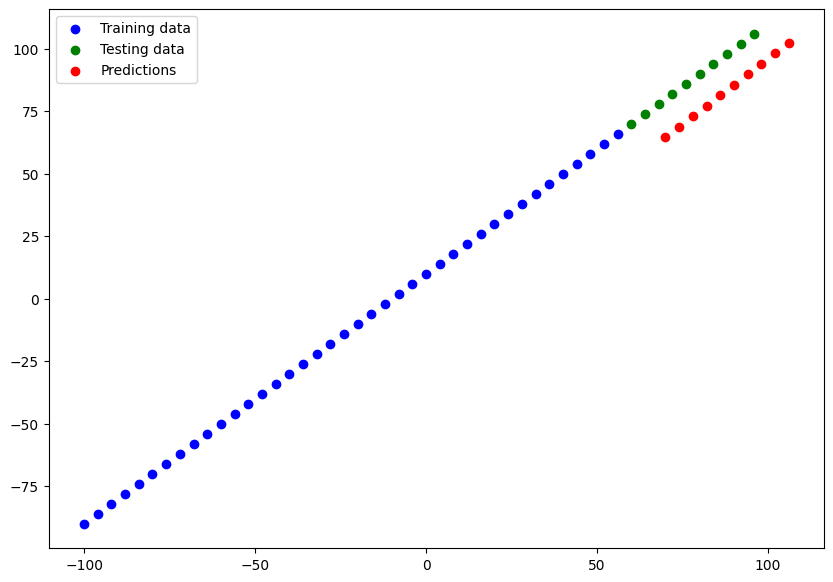

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(y_test, y_pred, c="r", label="Predictions")
plt.legend()

In [10]:
#Experimenting with model

In [11]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=500, verbose=0)     #500 epochs

y_pred = model_1.predict(X_test)

mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze())
mse

1/1 [==============================] - 0s 153ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=10.307284>

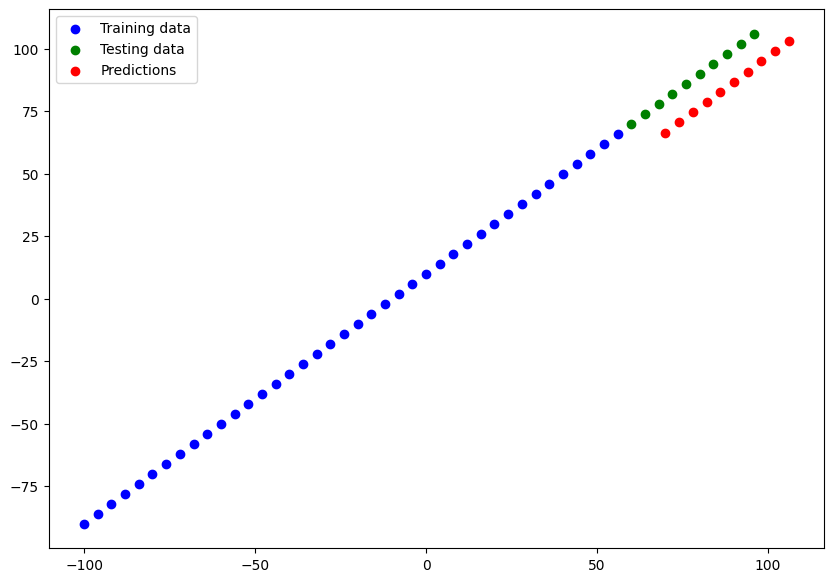

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(y_test, y_pred, c="r", label="Predictions")
plt.legend()

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)     #100 epochs

y_pred = model_2.predict(X_test)

mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze())
mse

1/1 [==============================] - 0s 97ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=1102.8352>

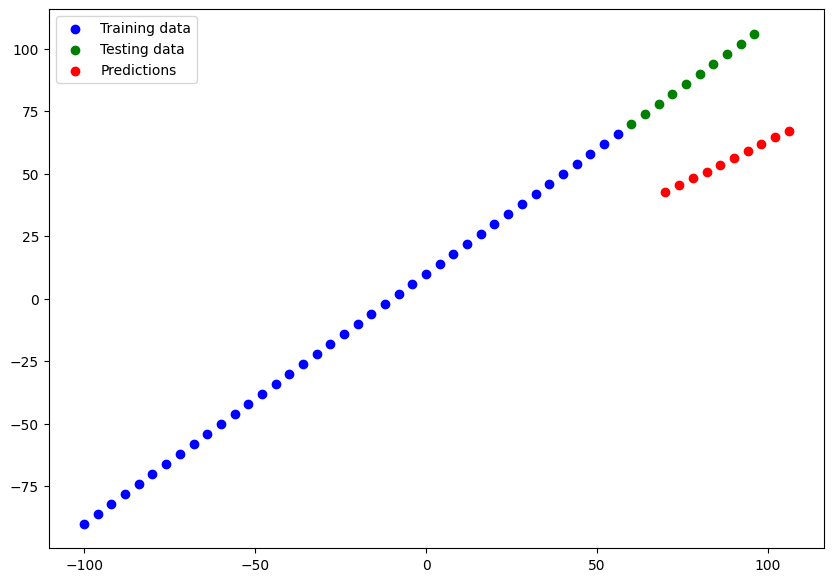

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(y_test, y_pred, c="r", label="Predictions")
plt.legend()

In [15]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)     #500 epochs

y_pred = model_3.predict(X_test)

mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze())
mse

1/1 [==============================] - 0s 181ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=1192.6194>

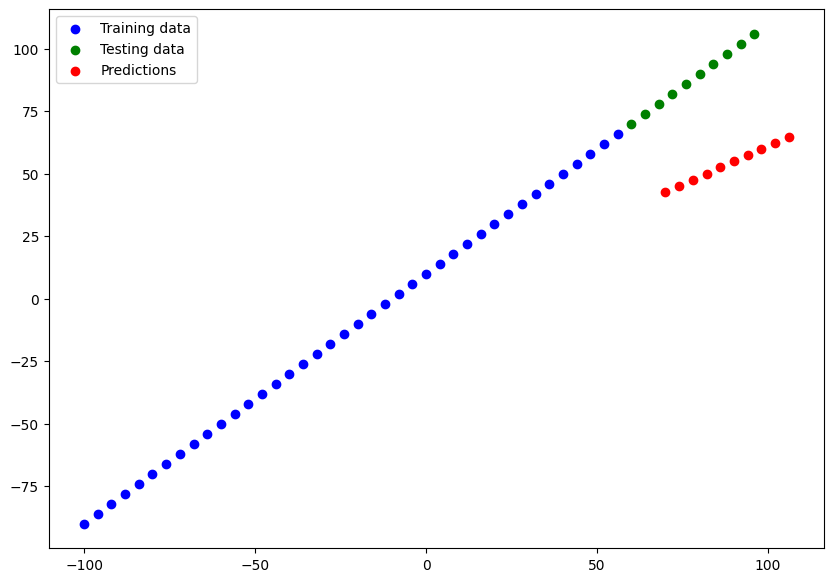

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.scatter(y_test, y_pred, c="r", label="Predictions")
plt.legend()

In [17]:
df = pd.read_csv("/content/sample_data/insurance.csv")

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
one_hot = pd.get_dummies(df)

In [20]:
one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [21]:
one_hot = one_hot.apply({lambda x: 1 if x==True else 0 if x==False else x}, axis=1)

In [22]:
one_hot.head()

,,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,<lambda>,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,<lambda>,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,<lambda>,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,<lambda>,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,<lambda>,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
one_hot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
X = one_hot.drop("charges", axis=1)
y = one_hot["charges"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 9015.0342 - mae: 9015.0342
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7833.3857 - mae: 7833.3857
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7553.2695 - mae: 7553.2695
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7787.3423 - mae: 7787.3423
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7746.5264 - mae: 7746.5264
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.5493 - mae: 7604.5493
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7531.2432 - mae: 7531.2432
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7738.0674 - mae: 7738.0674
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7577.1445 - mae: 7577.1445
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7705.8770 - mae: 7705.8770

In [27]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7353.3091 - mae: 7353.3091


[7353.30908203125, 7353.30908203125]

In [28]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [29]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4764.5156 - mae: 4764.5156


[4764.515625, 4764.515625]

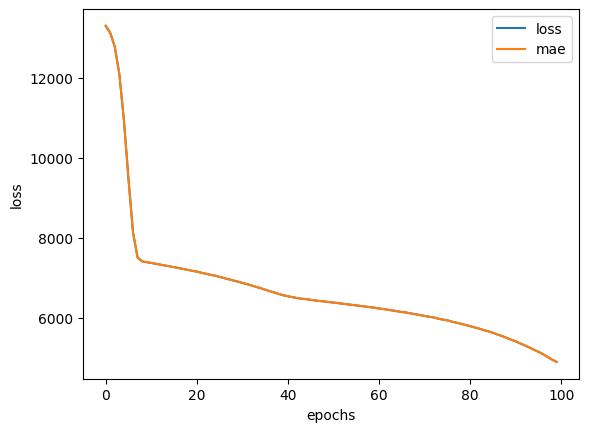

In [30]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [31]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3491.2214 - mae: 3491.2214


(3491.221435546875, 3491.221435546875)

Text(0.5, 0, 'epochs')

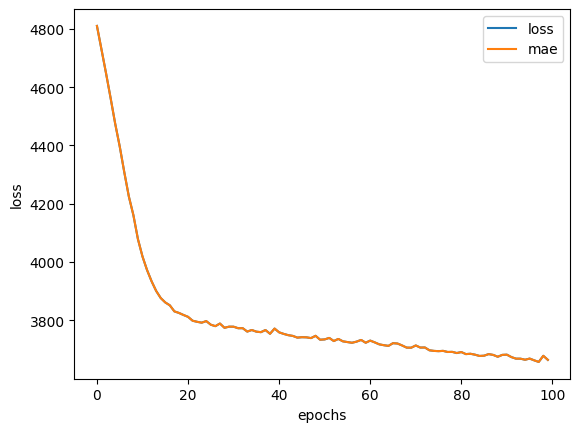

In [33]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [35]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [36]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [37]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [38]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [39]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.8047 - mae: 3169.8047


In [40]:
insurance_model_2_mae, insurance_model_3_mae

(3491.221435546875, 3169.8046875)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 493.7193 - mae: 493.7193
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 369.8616 - mae: 369.8616
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 251.3317 - mae: 251.3317
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 128.7573 - mae: 128.7573
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 50.9830 - mae: 50.9830
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 87.0061 - mae: 87.0061
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 72.9461 - mae: 72.9461
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.1486 - mae: 44.1486
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 51.7361 - mae: 51.7361
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.0704 - mae: 42.0704
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 7ms/step


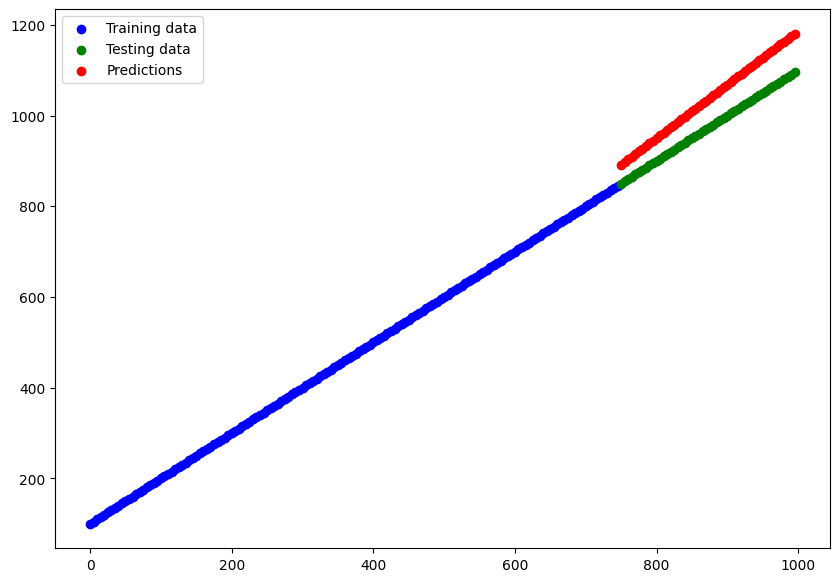

In [41]:
# Setup random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# **Classification with Tensorflow**

In [42]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [43]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [44]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [45]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [46]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

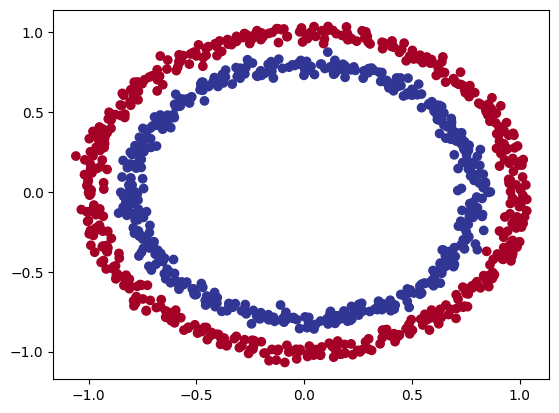

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [48]:
X.shape, y.shape

((1000, 2), (1000,))

In [49]:
# Check a sample
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [50]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.5471 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9539 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2655 - accuracy: 0.5280
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0570 - accuracy: 0.5190
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9389 - accuracy: 0.4920


In [51]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [52]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [53]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932429671287537, 0.5]

In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [55]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5130


[0.7000591158866882, 0.5130000114440918]

In [56]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


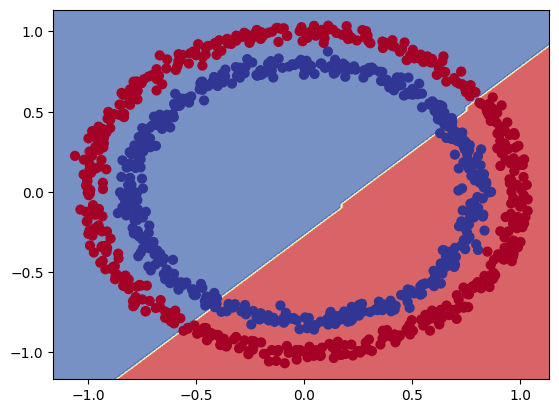

In [57]:
plot_decision_boundary(model_2, X, y)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3214 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0460 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8200 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6418 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3272 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0744 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9718 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9150 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8756 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8162 - accuracy: 0.5000
Epoch 11/

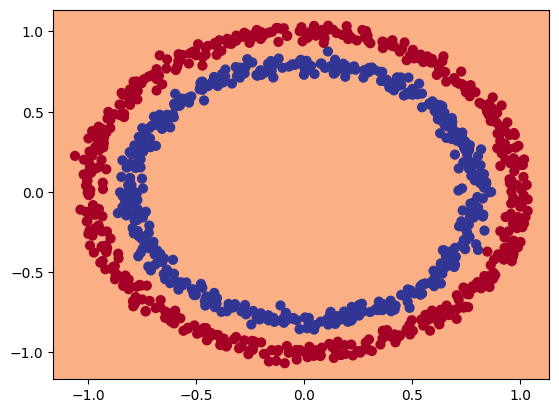

In [58]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_3.fit(X, y, epochs=100)


plot_decision_boundary(model_3, X, y)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.2077 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8936 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7465 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7007 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6426 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5395 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5275 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5205 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5151 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5101 - accuracy: 0.4690
Epoch 11/

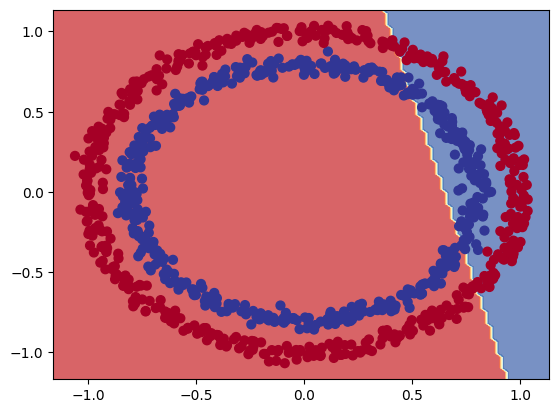

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)


plot_decision_boundary(model_4, X, y)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

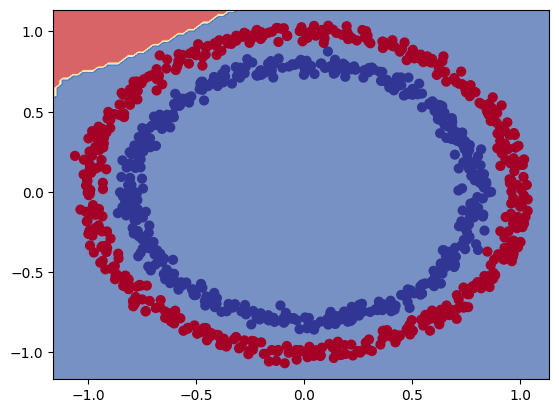

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100)


plot_decision_boundary(model_5, X, y)

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


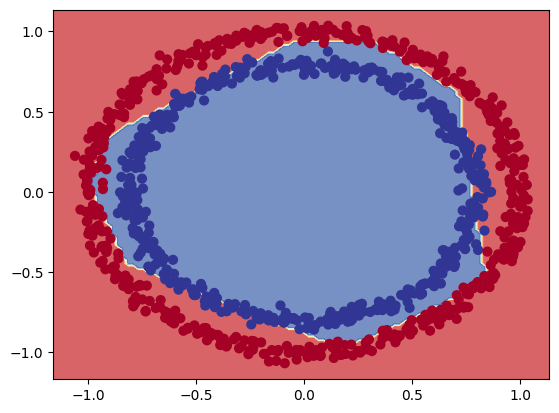

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)


plot_decision_boundary(model_6, X, y)

In [62]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4963
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5188
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5300
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5350
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6037
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5975
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6363
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6750
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6938
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7550
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 5ms/step
doing binary classifcation...


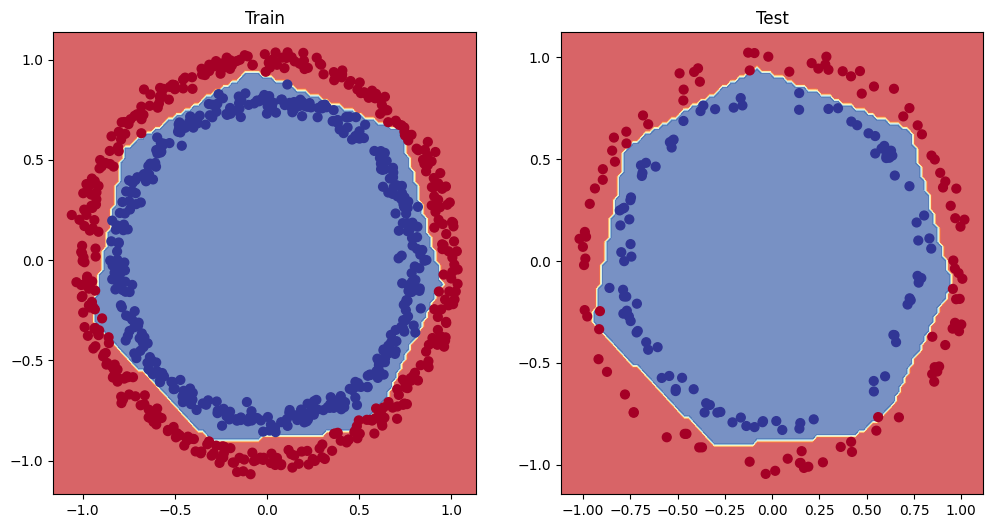

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_7 training curves')

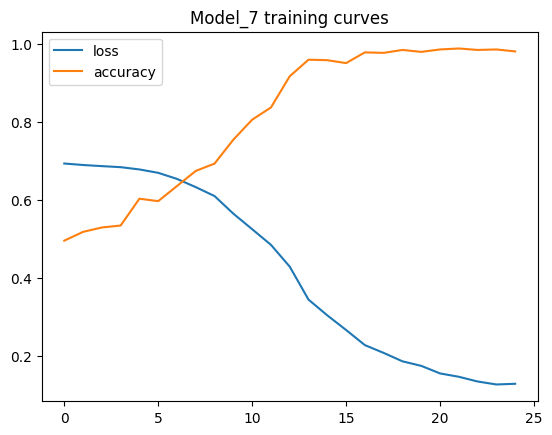

In [64]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

In [65]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_8.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 3s 11ms/step - loss: 0.6953 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6946 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss

<Axes: xlabel='epochs'>

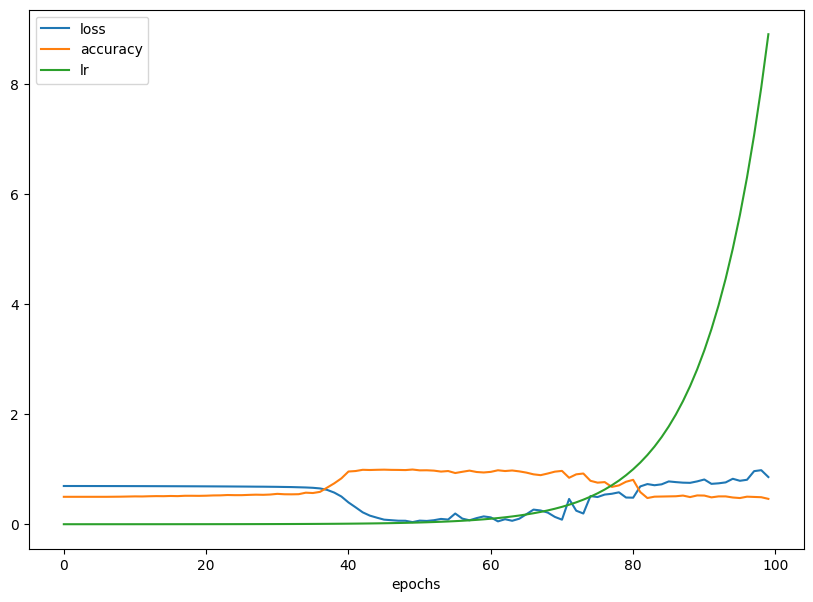

In [66]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

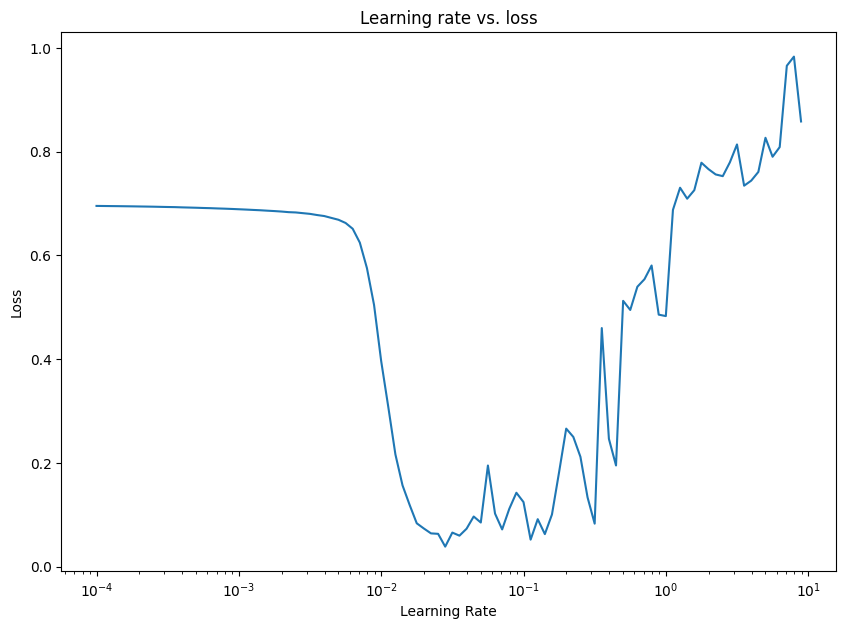

In [67]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [68]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 5ms/step - loss: 0.7020 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4863
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4963
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5013
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4963
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5013
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 11/20
25/25 [

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


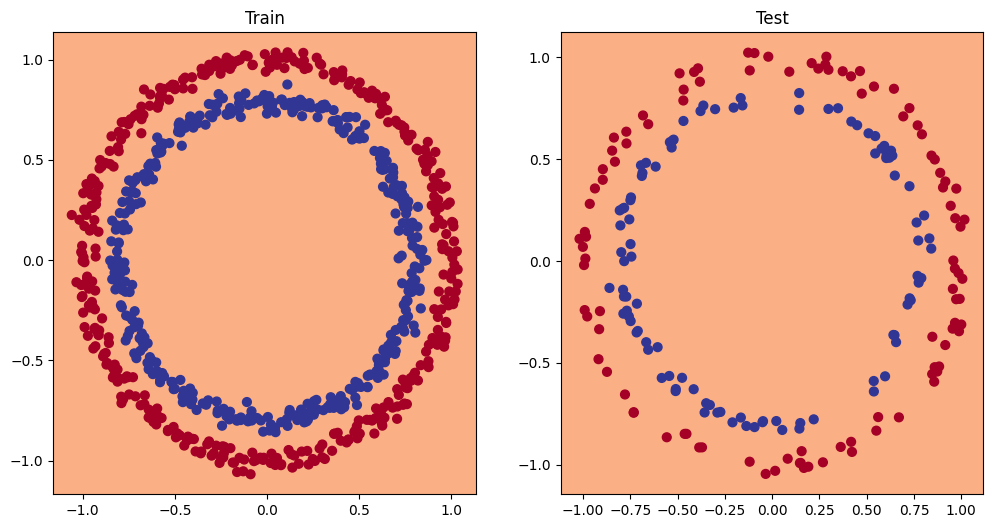

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

In [70]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_9.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[  0, 101],
       [  0,  99]])

In [77]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [78]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [79]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [80]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

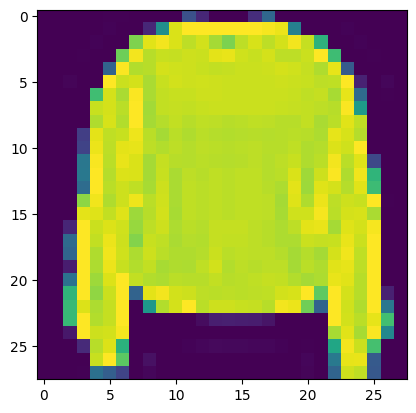

In [81]:
plt.imshow(train_data[7])

In [82]:
train_labels[7]

2

In [83]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

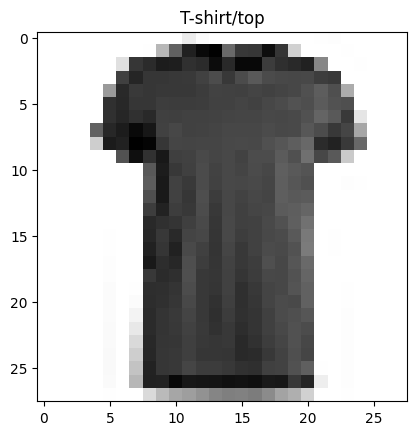

In [85]:
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]])

In [86]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.3296 - accuracy: 0.1403 - val_loss: 2.1110 - val_accuracy: 0.1716
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0570 - accuracy: 0.1841 - val_loss: 1.8938 - val_accuracy: 0.2389
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7848 - accuracy: 0.2398 - val_loss: 1.7313 - val_accuracy: 0.2593
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7078 - accuracy: 0.2612 - val_loss: 1.6891 - val_accuracy: 0.2647
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6756 - accuracy: 0.2758 - val_loss: 1.6641 - val_accuracy: 0.2779
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6589 - accuracy: 0.2857 - val_loss: 1.6454 - val_accuracy: 0.3126
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6441 - accuracy: 0.2929 - val_loss: 1.6423 - val_ac

In [87]:
model_11.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
train_data.min(), train_data.max()

(0, 255)

In [89]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [90]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.1962 - accuracy: 0.5681 - val_loss: 0.8627 - val_accuracy: 0.6901
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7491 - accuracy: 0.7141 - val_loss: 0.7263 - val_accuracy: 0.7036
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6548 - accuracy: 0.7521 - val_loss: 0.6471 - val_accuracy: 0.7754
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5755 - accuracy: 0.8000 - val_loss: 0.6010 - val_accuracy: 0.7924
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5425 - accuracy: 0.8127 - val_loss: 0.5836 - val_accuracy: 0.7962
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5268 - accuracy: 0.8181 - val_loss: 0.5676 - val_accuracy: 0.8032
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5161 - accuracy: 0.8214 - val_loss: 0.5957 - val_ac

<Axes: title={'center': 'Normalized Data'}>

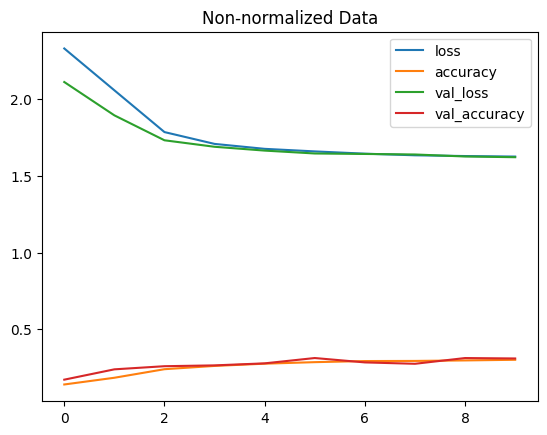

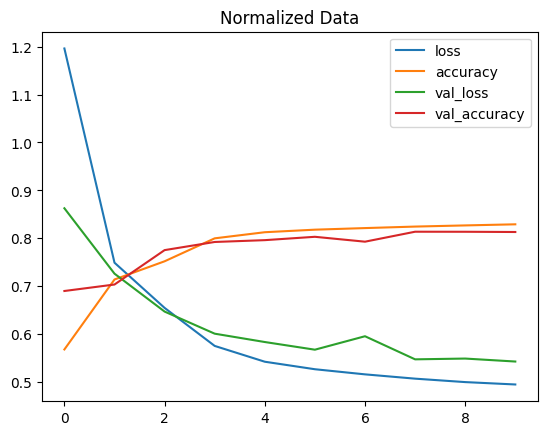

In [91]:
# non-normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

# mormalized data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [92]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 13s 6ms/step - loss: 1.3077 - accuracy: 0.4997 - val_loss: 0.9783 - val_accuracy: 0.6427 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8629 - accuracy: 0.6854 - val_loss: 0.8213 - val_accuracy: 0.7036 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7626 - accuracy: 0.7102 - val_loss: 0.7621 - val_accuracy: 0.7144 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7246 - accuracy: 0.7185 - val_loss: 0.7403 - val_accuracy: 0.7160 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7007 - accuracy: 0.7239 - val_loss: 0.7200 - val_accuracy: 0.7217 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6839 - accuracy: 0.7276 - val_loss: 0.7032 - val_accuracy: 0.7244 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

In [93]:
tf.random.set_seed(42)


model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_14.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2236 - accuracy: 0.5346 - val_loss: 0.9823 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8876 - accuracy: 0.6754 - val_loss: 0.8321 - val_accuracy: 0.7161 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7478 - accuracy: 0.7449 - val_loss: 0.7282 - val_accuracy: 0.7540 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6692 - accuracy: 0.7673 - val_loss: 0.6717 - val_accuracy: 0.7749 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6310 - accuracy: 0.7766 - val_loss: 0.6583 - val_accuracy: 0.7711 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6077 - accuracy: 0.7868 - val_loss: 0.6305 - val_accuracy: 0.7905 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5s

In [94]:
y_probs = model_14.predict(test_data)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.4862679e-10, 5.0901172e-11, 1.7131815e-21, 1.1588887e-11,
        1.5374411e-18, 4.9858484e-01, 4.8663727e-14, 5.0122648e-02,
        4.4733294e-08, 4.5129251e-01],
       [1.2964302e-05, 2.4824893e-17, 8.5128230e-01, 4.1915481e-08,
        1.1896839e-01, 2.0870655e-15, 2.9736143e-02, 1.2436678e-18,
        2.4668716e-07, 7.7428649e-29],
       [1.4561024e-02, 9.6599370e-01, 5.5525485e-05, 1.7969018e-02,
        1.0329079e-05, 5.6059798e-04, 3.8809865e-04, 3.1142475e-04,
        5.4323413e-05, 9.5924799e-05],
       [1.4561024e-02, 9.6599370e-01, 5.5525485e-05, 1.7969018e-02,
        1.0329079e-05, 5.6059798e-04, 3.8809865e-04, 3.1142475e-04,
        5.4323413e-05, 9.5924799e-05],
       [3.3869672e-01, 9.6016105e-05, 2.3206800e-01, 1.0946498e-02,
        2.6446857e-02, 1.9630847e-05, 3.9053264e-01, 1.2486028e-07,
        1.1934290e-03, 7.3124813e-12]], dtype=float32)

In [95]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([5, 2, 1, 1, 6, 1, 2, 6, 5, 7])

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[812,   9,  15,  70,   5,   3,  77,   0,   9,   0],
       [ 11, 934,   4,  47,   2,   0,   2,   0,   0,   0],
       [ 40,   1, 707,  17, 112,   0, 122,   0,   1,   0],
       [ 42,  25,  31, 814,  51,   0,  36,   0,   1,   0],
       [  2,   0, 206,  32, 645,   0, 111,   0,   4,   0],
       [  1,   1,   0,   1,   0, 936,   0,  28,   5,  28],
       [206,   2, 155,  49, 105,   0, 469,   0,  14,   0],
       [  0,   0,   0,   0,   0,  52,   0, 897,   3,  48],
       [  5,   0,   1,   6,  11,   8,  71,   4, 894,   0],
       [  0,   0,   0,   0,   0,  28,   1,  31,   0, 940]])

In [97]:
model_14.layers

In [101]:
model_14.layers[1]

# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape, biases.shape

(array([[ 0.01654412,  0.9105148 , -2.6232436 ,  0.3067114 ],
        [ 1.7432817 , -1.0299532 , -0.734258  , -0.9151647 ],
        [ 0.14073192,  2.9532254 , -1.7895044 , -2.2490368 ],
        ...,
        [ 2.2974975 ,  0.36773017, -1.0360804 ,  0.06425101],
        [ 3.3698466 , -0.9025374 , -0.29956463,  0.5137336 ],
        [ 1.5173376 , -0.38381523, -0.5823863 , -0.44866276]],
       dtype=float32),
 (784, 4),
 (4,))

In [102]:
model_14.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 4)                 3140      
                                                                 
 dense_52 (Dense)            (None, 4)                 20        
                                                                 
 dense_53 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


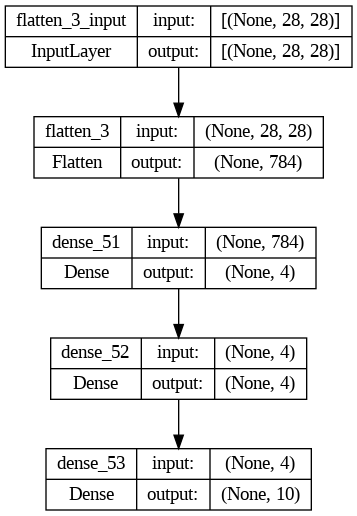

In [103]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

In [104]:
!pip install scikit-Plot

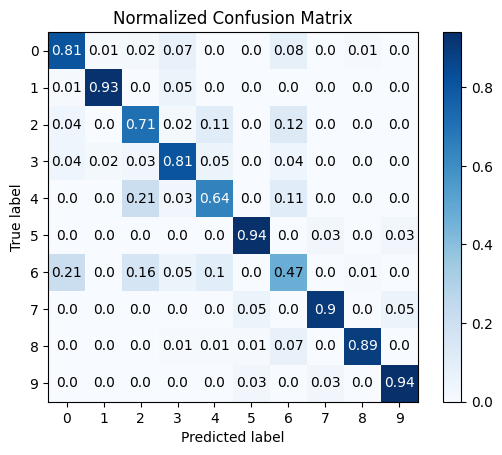

In [105]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(test_labels, y_preds, normalize=True)

plt.show()